In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import sys
from datetime import datetime
import numpy as np

In [4]:
def get_file_info(filename):
    file_contents = ""
    with open(filename) as f:
        for x in f:
            file_contents += x 
    return file_contents

In [5]:
def read_positions(positions):
    pos_list = positions.split("\n")
    new_positions = []
    for i in range(len(pos_list)):
        if len(pos_list[i]) > 0:
            curr = pos_list[i]
            new_arr = []
            new_arr.append(float(curr[1:curr.find(",")])) 
            new_str = curr[curr.find(",") + 1:]
            new_arr.append(float(new_str[0:new_str.find(",")]))
            new_arr.append(float(new_str[new_str.find(",") + 1:len(new_str)-1]))
            new_positions.append(new_arr)
    return np.array(new_positions)

In [89]:
def create_anim_helper(frame_skip, frame_start, folder):
    def anim_helper(frame, plt, ax):
        ax.clear()
        ax.set_xlim3d([-10, 10])
        ax.set_xlabel('X')

        ax.set_ylim3d([-10, 10])
        ax.set_ylabel('Y')

        ax.set_zlim3d([-10, 10])
        ax.set_zlabel('Z')

        ax.set_title('3D Fluid')
        print(frame * frame_skip + frame_start)
        # Provide starting angle for the view.
    #     ax.view_init(25, 10)
        ax.view_init(0, 0)
        locations = read_positions(get_file_info(folder + "/floor " + str(frame * frame_skip + frame_start) + ".txt"))

        locations = locations[idx]

        scatters = [ax.plot(locations[i][0], locations[i][1], locations[i][2], 'co') for i in range(len(locations))]
        return scatters
    return anim_helper

def create_animation(frames, fps, frame_skip=1, frame_start=0, folder='test'):
    fig = plt.figure(figsize = (10,10))
    ax = p3.Axes3D(fig)

    # Setting the axes properties

    ani = animation.FuncAnimation(fig, create_anim_helper(frame_skip, frame_start, folder), frames, fargs = [plt, ax],
                                       interval=int(1000 / (fps / frame_skip)), blit=False, repeat=True)

    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=int(fps / frame_skip), metadata=dict(artist='Me'), bitrate=-1, extra_args=['-vcodec', 'libx264'])
    ani.save('{}/fluid.mp4'.format(folder), writer=writer)

    plt.show()
    

/var/folders/8f/129y4_dx50d8nf5p18g2k44h0000gn/T/ipykernel_14568/3836928537.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


0
0
6
12
18
24
30
36
42
48
54
60
66
72
78
84
90
96
102
108
114
120
126
132
138
144
150
156
162
168
174


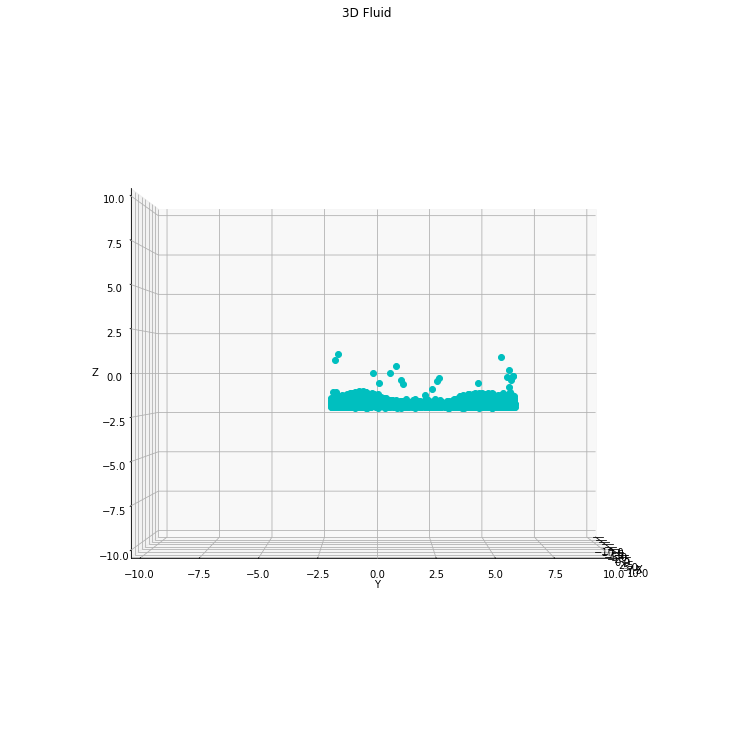

In [115]:
idx = np.random.choice(40 ** 3, int(40 ** 2), replace=True)

time = 3
fps = 60
frame_skip = int(fps / 10)

create_animation(int(time * fps / frame_skip), fps, frame_skip=frame_skip, folder='xcode/Debug')